In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
# 1. 문제정의
# 영화 리뷰 데이터셋을 활용해서 리뷰의 긍정/부정을 예측해보자
# 긍정/부정에서 많이 활용되는 단어 확인해보기

In [110]:
# 2. 데이터수집
# Large movie dataset 다운로드

In [111]:
# 여러 파일을 한번에 읽어오는 함수
from sklearn.datasets import load_files

In [112]:
train_data_path = './data/aclImdb/train/'
test_data_path = './data//aclImdb/test/'

In [113]:
reviews_train = load_files(train_data_path, shuffle=True)
reviews_test = load_files(test_data_path, shuffle=True)

In [114]:
len(reviews_train.data), len(reviews_test.data) 

(25000, 25000)

In [115]:
reviews_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [116]:
reviews_train.target_names

['neg', 'pos']

In [117]:
reviews_train.data[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [118]:
# 3. 데이터 전처리
# 텍스트 데이터의 전처리가 기존과 많이 다름
# 오탈자 제거, 띄어쓰기 교정, 불용어 제거(은, 는, 다), 정규화(먹는다, 먹겠다, 먹었다 => 먹다)
# 토큰화 : 텍스터 데이터를 분석 목적에 따라서 데이터를 나누는 기준이 달라짐
#           띄어쓰기 단위, 문장 단위, 형태소 단위

In [119]:
text_train = reviews_train.data[:1000]
text_test = reviews_test.data[:500]

In [120]:
# 띄어쓰기 기준으로 토큰화
# 숫자로 데이터를 변환해야함 > BOW(Bag Of Words) = CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
text = ['오탈자 제거, 띄어쓰기 교정, 불용어 제거(은, 는, 다), 정규화',
        '텍스터 데이터를 분석 목적에 따라서 데이터를 나누는',
        '배고파']
testcv = CountVectorizer()
testcv.fit(text) # 단어사전 구축축

CountVectorizer()

In [121]:
testcv.vocabulary_

{'오탈자': 9,
 '제거': 11,
 '띄어쓰기': 4,
 '교정': 0,
 '불용어': 8,
 '정규화': 10,
 '텍스터': 12,
 '데이터를': 2,
 '분석': 7,
 '목적에': 5,
 '따라서': 3,
 '나누는': 1,
 '배고파': 6}

In [122]:
# 숫자 = 단어가 나온 횟수
testcv.transform(text).toarray()

array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0],
       [0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [123]:
# BOW를 활용한 토큰화 > 많이 나오면 중요하다 생각 함
# 단순 띄어쓰기를 기준으로 토큰화
# 사용하는 단어가 너무 많게 되면 오히려 복잡해짐
# 긍정과 부정을 나누는데 효과적인 단어들은 소수
# 너무 많이 나온 단어와 너무 적게나온 단어는 별로 의미가 없음
# max_df=1000 = 단어가 1000번 이상 나왔다면 단어사전에 사용 X
# min_df= 50 = 단어가 50번 이하로 나왔다면 단어사전에 사용 X
# ngram_range=(1,2) = 띄어쓰기가 한번 떨어져 있는 것들도 단어로 사용
# 강의장 전면 > ngram_range=(1,2) > 강의장, 전면, 강의장 전면
movie_count = CountVectorizer(max_df=1500, min_df= 10, ngram_range=(1,2))
movie_count.fit(text_train)

CountVectorizer(max_df=1500, min_df=10, ngram_range=(1, 2))

In [124]:
#TFIDF를 이용한 토큰화> 많이 나온다고 무조건 중요한건 아니다, 적게나와도 중요할 수도 있다
from sklearn.feature_extraction.text import TfidfVectorizer
movie_tfidf = TfidfVectorizer(max_df=1500, min_df= 10, ngram_range=(1,2))
movie_tfidf.fit(text_train) # 단어사전 구축

TfidfVectorizer(max_df=1500, min_df=10, ngram_range=(1, 2))

In [125]:
#1000개의 리뷰에서 사용된 단어의 종류 확인
# 17995개의 단어 사용 > 3827개 
len(movie_count.vocabulary_)

3827

In [126]:
# 데이터 BOW  > 리뷰데이터를 띄어쓰기 기준으로 토큰화 하고 BOW 수치화
#X_train = movie_count.transform(text_train)
#X_test = movie_count.transform(text_test)
# 데이터에 TFIDF 적용 > 리뷰데이터를 띄어쓰기 기준으로 토큰화 하고 TFIDF 수치화
X_train = movie_tfidf.transform(text_train)
X_test = movie_tfidf.transform(text_test)
# 정답데이터
y_train =reviews_train.target[:1000]
y_test = reviews_test.target[:500]

In [127]:
# 4. 탐색적 데이터 분석
# 텍스트마이닝에선 생략

In [137]:
#5. 모델 선택 및 하이퍼 파라미터 튜닝
from sklearn.svm import LinearSVC
svc = LinearSVC()

In [138]:
# 6. 학습
svc.fit(X_train,y_train)

LinearSVC()

In [139]:
# 7. 평가
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X_train,y_train, cv = 5).mean()

0.8019999999999999

In [131]:
# 예측
# 예측을 하려는 데이터는 학습한 데이터와 동일한 전처리를 해줘야함
# it's a waste of time

In [140]:
# tfidf로 예측하기
review_pred =  ["it's a waste of time","it was a fun time"]
review_pred =  movie_tfidf.transform(review_pred)
svc.predict(review_pred)

array([0, 1])

In [133]:
# 긍/ 부정에 영향을 끼친 단어 시각화
# 1. 사용된 단어 
voca = movie_tfidf.vocabulary_
# 2. 단어의 가중치
weight = svc.coef_

In [134]:
# 단어 정렬
import pandas as pd
df = pd.DataFrame([voca.keys(),voca.values()])
df = df.T
df = df.sort_values(by=1)
df['weight']=weight.reshape(-1)
df.sort_values(by='weight',inplace=True)
df # bad worst enjoy feel

,0,1,weight
97,bad,347,-2.128823
1763,awful,339,-1.609173
584,worst,3754,-1.380865
265,to be,3304,-1.220388
6,even,943,-1.207998
...,...,...,...
40,perfect,2371,1.099008
138,very,3491,1.291717
1258,enjoy,914,1.300703
19,it,1636,1.656273


In [ ]:
top_30 = pd.concat([df.head(20),df.tail(20)])
top_30

<function matplotlib.pyplot.show(close=None, block=None)>

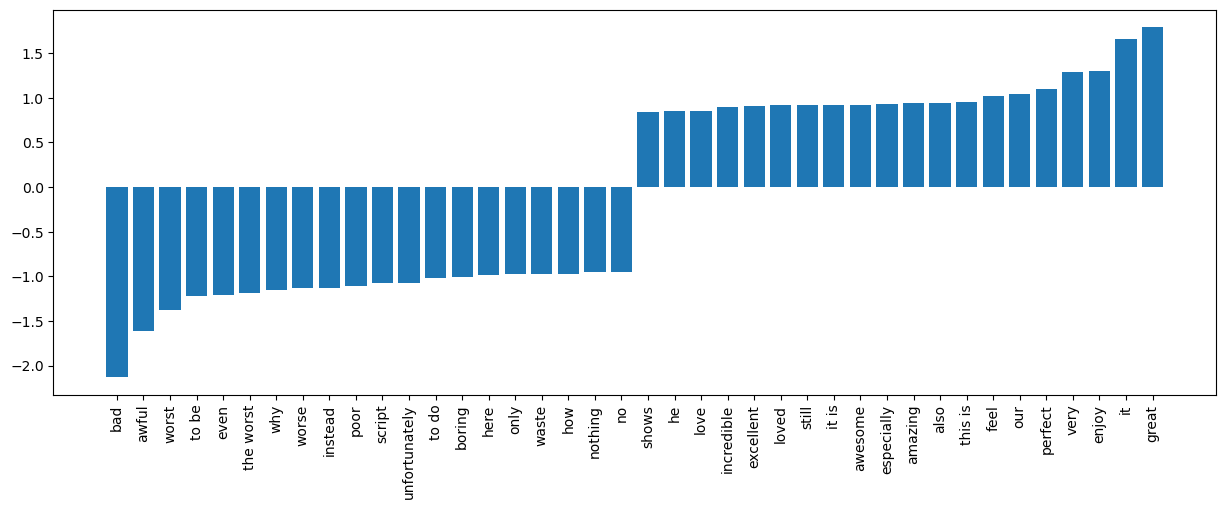

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5)) # 그래프 크기 조절하기
plt.bar(top_30[0], top_30['weight'])
plt.xticks(rotation=90) # x축 눈금 각도 조정
plt.show